In [16]:
import pandas as pd

In [17]:
df1=pd.read_csv("input.csv")
df2=pd.read_csv("loan_dat.csv")
df3=pd.read_csv("output.csv")

In [18]:
print(df1.head())
print(df2.head())
print(df3.head())

   1  0.1189   829.1  11.35040654  19.48  737  5639.958333  28854  52.1  0  \
0  1  0.1071  228.22    11.082143  14.29  707  2760.000000  33623  76.7  0   
1  1  0.1357  366.86    10.373491  11.63  682  4710.000000   3511  25.6  1   
2  1  0.1008  162.34    11.350407   8.10  712  2699.958333  33667  73.2  1   
3  1  0.1426  102.92    11.299732  14.97  667  4066.000000   4740  39.5  0   
4  1  0.0788  125.13    11.904968  16.98  727  6120.041667  50807  51.0  0   

   0.1  0.2  0.3  0.4  1.1  0.5  0.6  0.7  
0    0    0    0    1    0    0    0    0  
1    0    0    0    0    1    0    0    0  
2    0    0    0    0    1    0    0    0  
3    1    0    0    1    0    0    0    0  
4    0    0    0    1    0    0    0    0  
   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consoli

In [19]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(9577, 18)
(9578, 14)
(9577, 2)


In [20]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['1', '0.1189', '829.1', '11.35040654', '19.48', '737', '5639.958333',
       '28854', '52.1', '0', '0.1', '0.2', '0.3', '0.4', '1.1', '0.5', '0.6',
       '0.7'],
      dtype='object')
Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')
Index(['0', '1'], dtype='object')


In [21]:
combined_df = pd.concat([df1, df2, df3], axis=1)

In [22]:
print(combined_df.shape)
print(combined_df.head())
print(combined_df.columns)

(9578, 34)
     1  0.1189   829.1  11.35040654  19.48    737  5639.958333    28854  52.1  \
0  1.0  0.1071  228.22    11.082143  14.29  707.0  2760.000000  33623.0  76.7   
1  1.0  0.1357  366.86    10.373491  11.63  682.0  4710.000000   3511.0  25.6   
2  1.0  0.1008  162.34    11.350407   8.10  712.0  2699.958333  33667.0  73.2   
3  1.0  0.1426  102.92    11.299732  14.97  667.0  4066.000000   4740.0  39.5   
4  1.0  0.0788  125.13    11.904968  16.98  727.0  6120.041667  50807.0  51.0   

     0  ...  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  0.0  ...   737        5639.958333      28854        52.1               0   
1  1.0  ...   707        2760.000000      33623        76.7               0   
2  1.0  ...   682        4710.000000       3511        25.6               1   
3  0.0  ...   712        2699.958333      33667        73.2               1   
4  0.0  ...   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  no

In [23]:
categorical_columns = combined_df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
['purpose']


In [24]:
one_hot_encoded = pd.get_dummies(combined_df['purpose'], prefix='purpose')
combined_df = pd.concat([combined_df, one_hot_encoded], axis=1)
combined_df.drop('purpose', axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
combined_df['credit.policy'] = label_encoder.fit_transform(combined_df['credit.policy'])

print(combined_df.head())
print(combined_df.shape)
print(combined_df.columns)


     1  0.1189   829.1  11.35040654  19.48    737  5639.958333    28854  52.1  \
0  1.0  0.1071  228.22    11.082143  14.29  707.0  2760.000000  33623.0  76.7   
1  1.0  0.1357  366.86    10.373491  11.63  682.0  4710.000000   3511.0  25.6   
2  1.0  0.1008  162.34    11.350407   8.10  712.0  2699.958333  33667.0  73.2   
3  1.0  0.1426  102.92    11.299732  14.97  667.0  4066.000000   4740.0  39.5   
4  1.0  0.0788  125.13    11.904968  16.98  727.0  6120.041667  50807.0  51.0   

     0  ...  not.fully.paid    0    1  purpose_all_other  purpose_credit_card  \
0  0.0  ...               0  0.0  1.0                  0                    0   
1  1.0  ...               0  0.0  1.0                  0                    1   
2  1.0  ...               0  0.0  1.0                  0                    0   
3  0.0  ...               0  0.0  1.0                  0                    0   
4  0.0  ...               0  0.0  1.0                  0                    1   

   purpose_debt_consolidat

In [31]:
df=combined_df
selected_columns = [
    'credit.policy', 'int.rate', 'installment', 'log.annual.inc',
    'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
    'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
    'purpose_all_other', 'purpose_credit_card', 'purpose_debt_consolidation',
    'purpose_educational', 'purpose_home_improvement',
    'purpose_major_purchase', 'purpose_small_business'
]
df_selected = df[selected_columns]

numerical_stats = df_selected.describe()
print(numerical_stats)


       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.0000

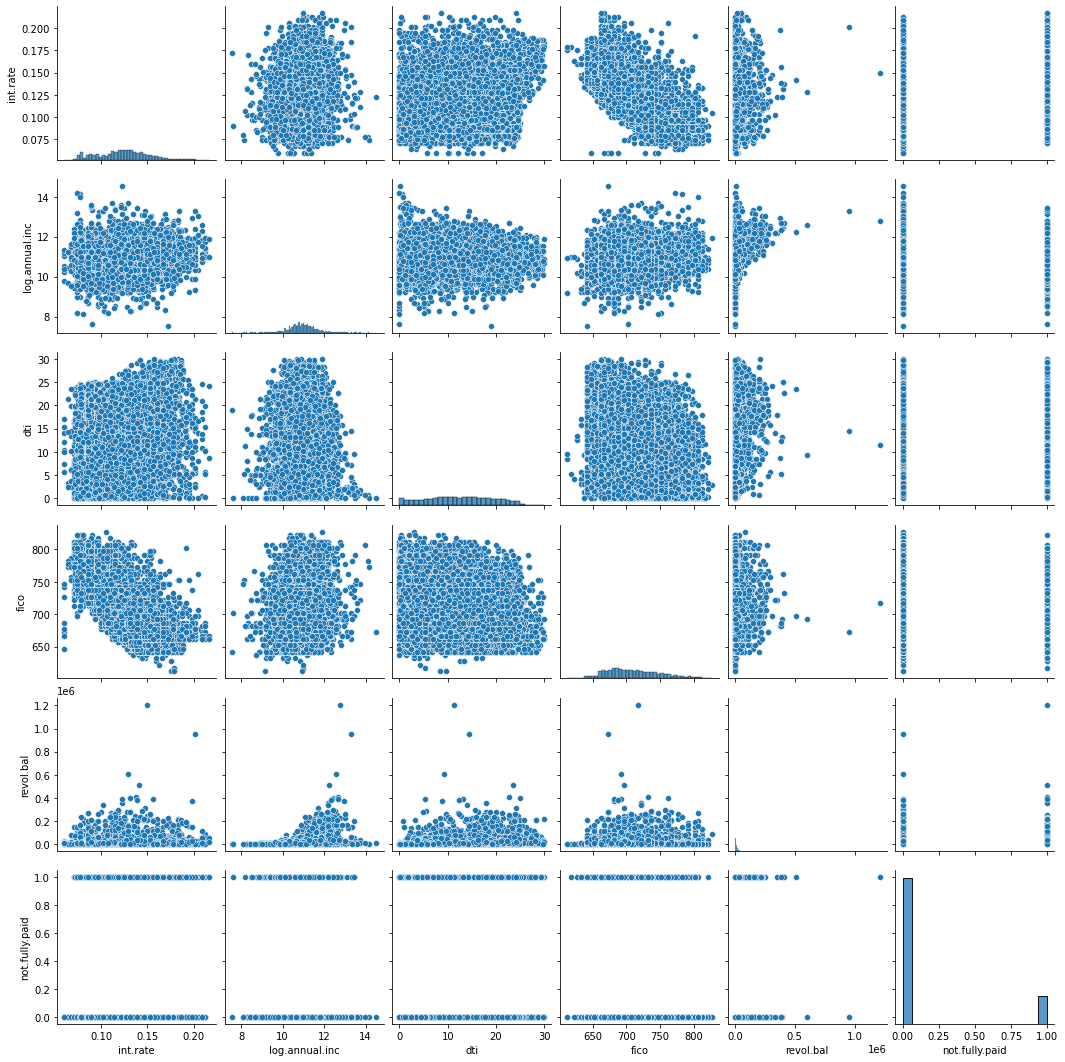

In [32]:
sns.pairplot(df_selected[['int.rate', 'log.annual.inc', 'dti', 'fico', 'revol.bal', 'not.fully.paid']])
plt.show()

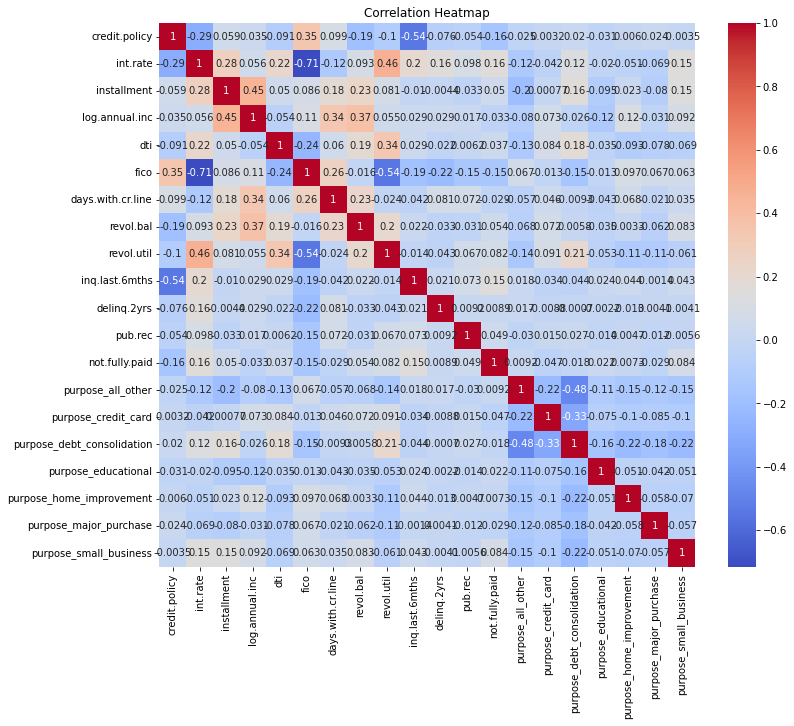

In [33]:
correlation_matrix = df_selected.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

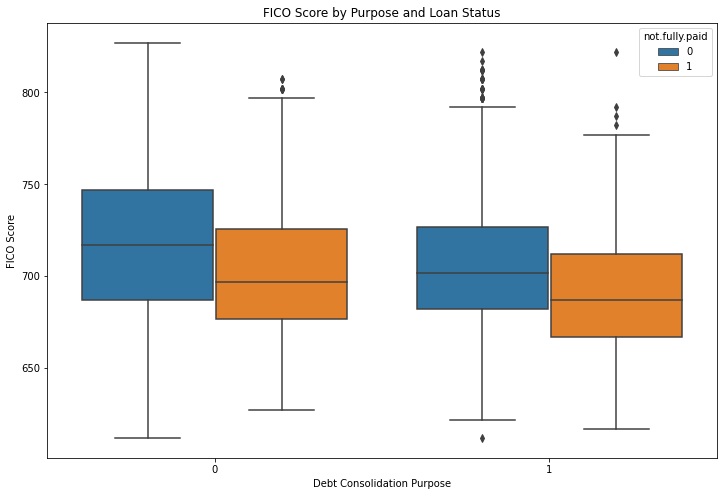

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_selected, x='purpose_debt_consolidation', y='fico', hue='not.fully.paid')
plt.title('FICO Score by Purpose and Loan Status')
plt.xlabel('Debt Consolidation Purpose')
plt.ylabel('FICO Score')
plt.show()

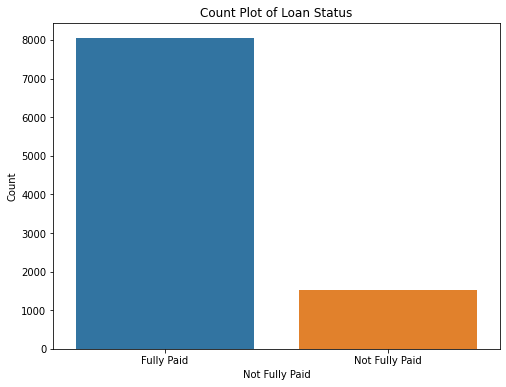

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_selected, x='not.fully.paid')
plt.title('Count Plot of Loan Status')
plt.xlabel('Not Fully Paid')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fully Paid', 'Not Fully Paid'])  
plt.show()


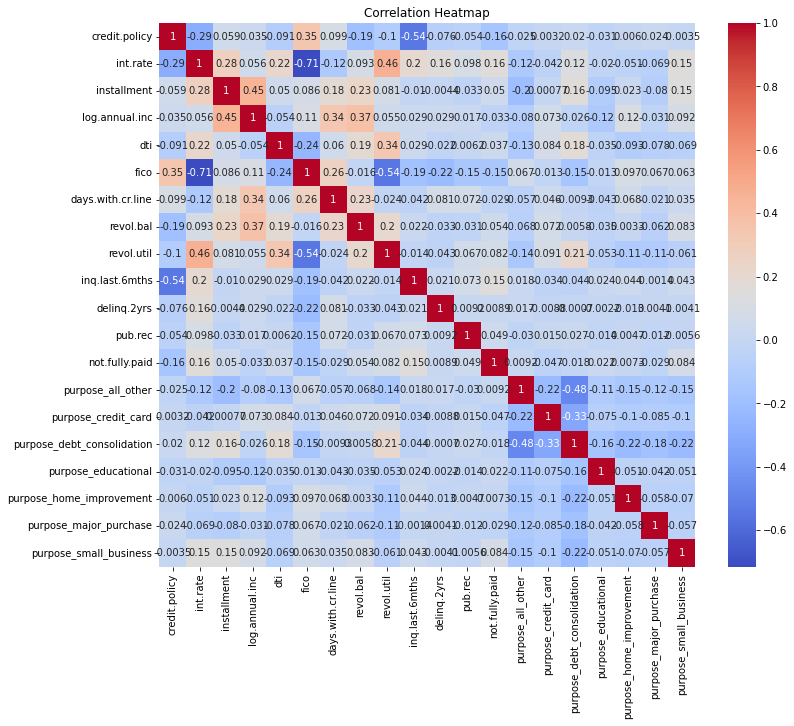

Highly Correlated Feature Pairs:
('int.rate', 'fico')


In [37]:
correlation_matrix = df_selected.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
correlation_threshold = 0.7

highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

print('Highly Correlated Feature Pairs:')
for pair in highly_correlated_pairs:
    print(pair)

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


2023-08-24 03:01:11.952287: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2023-08-24 03:01:14.219206: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [39]:
X = df.drop(['not.fully.paid'], axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
192/192 [==============================] - 1s 2ms/step - loss: 0.4763 - accuracy: 0.8093 - val_loss: 0.4232 - val_accuracy: 0.8389
Epoch 2/10
192/192 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8403 - val_loss: 0.4191 - val_accuracy: 0.8356
Epoch 3/10
192/192 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8395 - val_loss: 0.4133 - val_accuracy: 0.8421
Epoch 4/10
192/192 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8404 - val_loss: 0.4171 - val_accuracy: 0.8376
Epoch 5/10
192/192 [==============================] - 0s 1ms/step - loss: 0.3935 - accuracy: 0.8426 - val_loss: 0.4165 - val_accuracy: 0.8402
Epoch 6/10
192/192 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.8429 - val_loss: 0.4188 - val_accuracy: 0.8402
Epoch 7/10
192/192 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8463 - val_loss: 0.4197 - val_accuracy: 0.8330
Epoch 

In [42]:
# Cross-validation to evaluate performance
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = []

for train_idx, val_idx in kfold.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Preprocessing
    scaler = StandardScaler()
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)

    # Build and train the model
    model = Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_fold_scaled, y_train_fold, epochs=10, batch_size=32, verbose=0)

    # Evaluate on validation set
    _, accuracy = model.evaluate(X_val_fold_scaled, y_val_fold)
    cross_val_scores.append(accuracy)

print(f'Cross-Validation Mean Accuracy: {np.mean(cross_val_scores)}')


60/60 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8402
Cross-Validation Mean Accuracy: 0.839215087890625


In [44]:
from tensorflow.keras import callbacks
def build_and_evaluate_model(X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)
    
    _, accuracy = model.evaluate(X_val, y_val)
    return accuracy

# Scenario 1: Drop 'int.rate'
X_scenario1 = X.drop(['int.rate'], axis=1)
scenario1_scores = []

# Scenario 2: Drop 'fico'
X_scenario2 = X.drop(['fico'], axis=1)
scenario2_scores = []

for train_idx, val_idx in kfold.split(X, y):
    X_train_fold1, X_val_fold1 = X_scenario1.iloc[train_idx], X_scenario1.iloc[val_idx]
    X_train_fold2, X_val_fold2 = X_scenario2.iloc[train_idx], X_scenario2.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Preprocessing
    scaler = StandardScaler()
    X_train_fold_scaled1 = scaler.fit_transform(X_train_fold1)
    X_val_fold_scaled1 = scaler.transform(X_val_fold1)
    X_train_fold_scaled2 = scaler.fit_transform(X_train_fold2)
    X_val_fold_scaled2 = scaler.transform(X_val_fold2)

    # Build and evaluate the models
    accuracy_scenario1 = build_and_evaluate_model(X_train_fold_scaled1, y_train_fold, X_val_fold_scaled1, y_val_fold)
    accuracy_scenario2 = build_and_evaluate_model(X_train_fold_scaled2, y_train_fold, X_val_fold_scaled2, y_val_fold)

    scenario1_scores.append(accuracy_scenario1)
    scenario2_scores.append(accuracy_scenario2)

print(f'Scenario 1 - Cross-Validation Mean Accuracy: {np.mean(scenario1_scores)}')
print(f'Scenario 2 - Cross-Validation Mean Accuracy: {np.mean(scenario2_scores)}')

60/60 [==============================] - 0s 932us/step - loss: nan - accuracy: 0.8402
Scenario 1 - Cross-Validation Mean Accuracy: 0.8398413896560669
Scenario 2 - Cross-Validation Mean Accuracy: 0.8399457812309266
